# LAB 2.2: MLP & Backpropagation

**Czas:** 2h | **Temat:** Szczegółowa matematyka sieci neuronowych

## Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
print('✓ Setup complete')

✓ Setup complete


## CZĘŚĆ 1: Backpropagation - Matematyka

### Forward Pass:
```
z₁ = W₁x + b₁
a₁ = σ(z₁)
z₂ = W₂a₁ + b₂
a₂ = σ(z₂)
ŷ = a₂
```

### Backward Pass (Chain Rule):
```
∂L/∂W₂ = ∂L/∂a₂ · ∂a₂/∂z₂ · ∂z₂/∂W₂
∂L/∂W₁ = ∂L/∂a₂ · ∂a₂/∂z₂ · ∂z₂/∂a₁ · ∂a₁/∂z₁ · ∂z₁/∂W₁
```

### Zadanie 1: Implementacja różnych optimizers

In [7]:
# TODO: Implement SGD, Momentum, Adam
class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
    
    def update(self, params, grads):
        for key in params.keys():
            # Standardowy wzór SGD: w = w - lr * grad
            params[key] -= self.lr * grads[key]

class MomentumOptimizer:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.lr = learning_rate
        self.momentum = momentum
        self.v = {}
    
    def update(self, params, grads):
        v = momentum * v - lr * grad
        params += v

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = {}
        self.v = {}
        self.t = 0
    
    def update(self, params, grads):
        m = beta1 * m + (1-beta1) * grad
        v = beta2 * v + (1-beta2) * grad^2
        m_hat = m / (1-beta1^t)
        v_hat = v / (1-beta2^t)
        params -= lr * m_hat / (sqrt(v_hat) + eps)
        

## CZĘŚĆ 2: Mini-batch Training

In [8]:
# TODO: Implement mini-batch gradient descent
def create_mini_batches(X, y, batch_size=32):
    mini_batches = []
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    n_minibatches = X.shape[0] // batch_size
    
    for i in range(n_minibatches):
        X_batch = X_shuffled[i * batch_size : (i + 1) * batch_size]
        y_batch = y_shuffled[i * batch_size : (i + 1) * batch_size]
        mini_batches.append((X_batch, y_batch))
        
    if X.shape[0] % batch_size != 0:
        X_batch = X_shuffled[n_minibatches * batch_size :]
        y_batch = y_shuffled[n_minibatches * batch_size :]
        mini_batches.append((X_batch, y_batch))
        
    return mini_batches

# TODO: Train with mini-batches
# for epoch in range(n_epochs):
#     for X_batch, y_batch in mini_batches:
#         # forward + backward + update
#         pass

## CZĘŚĆ 3: MNIST Classification

In [9]:
from sklearn.preprocessing import OneHotEncoder

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'].values, mnist['target'].values.astype(int)

# A. Normalize to [0,1]
X = X / 255.0

# B. One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# C. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42
)

print(f'Dataset shape: {X.shape}')

Dataset shape: (70000, 784)


Rozpoczynam trening na zbiorze MNIST...
Epoch 1/15 | Loss: 0.1680
Epoch 2/15 | Loss: 0.1063
Epoch 3/15 | Loss: 0.0958
Epoch 4/15 | Loss: 0.0926
Epoch 5/15 | Loss: 0.0912
Epoch 6/15 | Loss: 0.0906
Epoch 7/15 | Loss: 0.0903
Epoch 8/15 | Loss: 0.0901
Epoch 9/15 | Loss: 0.0900
Epoch 10/15 | Loss: 0.0899
Epoch 11/15 | Loss: 0.0898
Epoch 12/15 | Loss: 0.0898
Epoch 13/15 | Loss: 0.0898
Epoch 14/15 | Loss: 0.0898
Epoch 15/15 | Loss: 0.0897


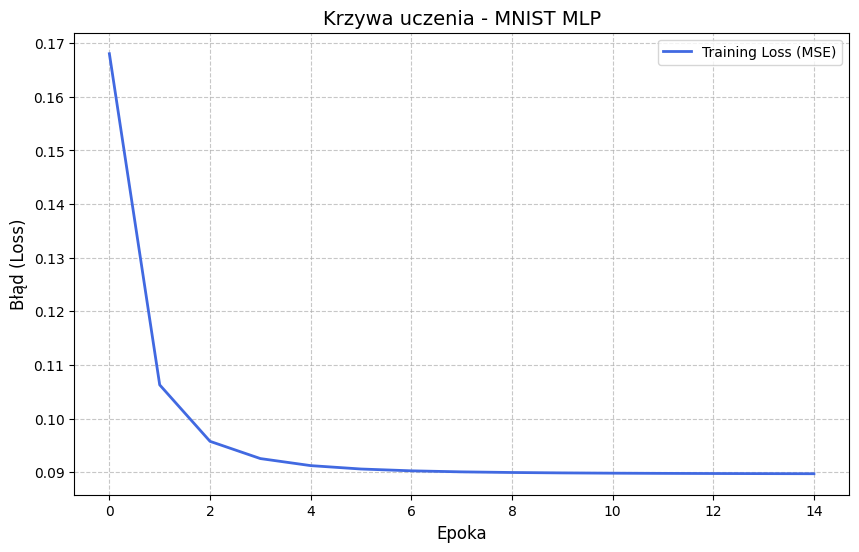

In [11]:
class MLPClassifier:
    def __init__(self, layers=[784, 128, 64, 10], lr=0.01):
        self.lr = lr
        self.params = {
            'W1': np.random.randn(layers[0], layers[1]) * 0.1,
            'b1': np.zeros((1, layers[1])),

            'W2': np.random.randn(layers[1], layers[2]) * 0.1,
            'b2': np.zeros((1, layers[2])),

            'W3': np.random.randn(layers[2], layers[3]) * 0.1,
            'b3': np.zeros((1, layers[3]))
        }
        self.optimizer = Optimizer(learning_rate=self.lr)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        z1 = np.dot(X, self.params['W1']) + self.params['b1']
        a1 = self._sigmoid(z1)
        
        z2 = np.dot(a1, self.params['W2']) + self.params['b2']
        a2 = self._sigmoid(z2)
        
        z3 = np.dot(a2, self.params['W3']) + self.params['b3']
        a3 = self._sigmoid(z3)
        
        return {
            'z1': z1, 'a1': a1,
            'z2': z2, 'a2': a2,
            'z3': z3, 'a3': a3
        }
    
    def backward(self, X, y, act): 
        m = X.shape[0] 
        
        def d_sigmoid(a): return a * (1 - a)

        dz3 = (act['a3'] - y) * d_sigmoid(act['a3'])
        dW3 = np.dot(act['a2'].T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = np.dot(dz3, self.params['W3'].T) * d_sigmoid(act['a2'])
        dW2 = np.dot(act['a1'].T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.params['W2'].T) * d_sigmoid(act['a1'])
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        return {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2, 'W3': dW3, 'b3': db3}

    def train(self, X, y, epochs=10, batch_size=32):
        loss_history = []
        
        for epoch in range(epochs):
            batches = create_mini_batches(X, y, batch_size)
            epoch_loss = 0
            
            for X_batch, y_batch in batches:
                activations = self.forward(X_batch)
                y_pred = activations['a3']
                
                batch_loss = np.mean((y_batch - y_pred)**2)
                epoch_loss += batch_loss
                
                grads = self.backward(X_batch, y_batch, activations)
                
                self.optimizer.update(self.params, grads)
            
            avg_loss = epoch_loss / len(batches)
            loss_history.append(avg_loss)
            print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f}")
            
        return loss_history
    


model = MLPClassifier(layers=[784, 128, 64, 10], lr=0.001)

print("Rozpoczynam trening na zbiorze MNIST...")
history = model.train(X_train, y_train, epochs=15, batch_size=64)

plt.figure(figsize=(10, 6))
plt.plot(history, label='Training Loss (MSE)', color='royalblue', lw=2)
plt.title('Krzywa uczenia - MNIST MLP', fontsize=14)
plt.xlabel('Epoka', fontsize=12)
plt.ylabel('Błąd (Loss)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## PODSUMOWANIE

✅ Backpropagation szczegółowo
✅ Różne optimizers
✅ Mini-batch training
✅ MNIST classification


Podsumowanie: praktyczna implementacja teorii i matematyki stojącej za modelami uczenia maszynowego. 